In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlretrieve


In [4]:
file =pd.read_csv(r"E:\IMDB data set\original_data.csv")


In [18]:
file.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

# checking for columns and data inconsistency if any


In [7]:
file.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


# checking null values

In [9]:
file.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

# Data cleaning

In [16]:
#meta score
file.Meta_score=pd.to_numeric(file.Meta_score,errors='coerce')
file.Meta_score=file.Meta_score.fillna(0)


In [22]:
#runtime
file.Runtime=file.Runtime.str.replace('min','',regex=False)
file.Runtime=pd.to_numeric(file.Runtime,errors='coerce')

In [23]:
#certificate
file.Certificate=file.Certificate.fillna('Unrated')

In [24]:
file.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# saving clean data


In [66]:
file.to_csv('cleaned.csv',index=False)

## 🎫 Certificate Distribution

Understanding the distribution of movie certificates helps identify the content rating types that dominate the dataset.

This is useful for both audience targeting and analyzing rating trends across different content categories (e.g., PG, R, PG-13, etc.).


In [30]:
cer=file.Certificate.value_counts().reset_index()
cer.columns=['Certificate','Num']
cer.sort_values('Num',ascending=False)
print(cer)

   Certificate  Num
0            U  234
1            A  197
2           UA  175
3            R  146
4      Unrated  102
5        PG-13   43
6           PG   37
7       Passed   34
8            G   12
9     Approved   11
10       TV-PG    3
11          GP    2
12       TV-MA    1
13          16    1
14       TV-14    1
15         U/A    1


* Most of the movies are in the category of U,A,UA and R
* The certificate category U has highest Movies with 234 Movies
  

## 📊 Certificate vs IMDb, Gross, Runtime & Meta Score

To get a broader view of how movie certifications relate to key metrics, we grouped by `Certificate` and calculated the average for:

- **IMDb Rating** (audience reception)
- **Gross** (box office performance)
- **Runtime** (length)
- **Meta Score** (critic rating)

This helps us spot patterns like:
- Do U-rated films tend to be shorter?
- Do A-rated films earn more?
- Which certification gets the highest critic scores?


In [35]:
new_file=file.groupby('Certificate')[['IMDB_Rating','Gross','Runtime','Meta_score']].mean()
new_file.sort_values('IMDB_Rating',ascending=False,inplace=True)
new_file.head(15)

,IMDB_Rating,Gross,Runtime,Meta_score
Certificate,,,,
TV-14,8.300000,0.0,132.000000,0.000000
16,8.100000,0.0,130.000000,78.000000
TV-MA,8.100000,0.0,106.000000,0.000000
Passed,8.020588,0.0,106.205882,46.205882
G,8.000000,0.0,119.666667,71.750000
A,7.998985,0.0,128.939086,73.994924
U,7.976923,0.0,124.158120,67.948718
UA,7.957143,0.0,129.331429,62.314286
Approved,7.945455,0.0,111.090909,72.000000


* Insights
  * The **TV_14** has the highest IMDb rating with an average of **8.3**
    

## 🏆 Top 10 Highest IMDb Rated Movies
This gives us the top 10 movies, which can be used as benchmarks when exploring trends in genres, runtime, certificates, and box office performance.


In [37]:
top_10_movies_imdb=file.sort_values('IMDB_Rating',ascending=False)
top_10_movies_imdb[['Series_Title', 'IMDB_Rating', 'Genre', 'Certificate', 'Runtime']].head(10)


,Series_Title,IMDB_Rating,Genre,Certificate,Runtime
0,The Shawshank Redemption,9.3,Drama,A,142
1,The Godfather,9.2,"Crime, Drama",A,175
4,12 Angry Men,9.0,"Crime, Drama",U,96
2,The Dark Knight,9.0,"Action, Crime, Drama",UA,152
3,The Godfather: Part II,9.0,"Crime, Drama",A,202
5,The Lord of the Rings: The Return of the King,8.9,"Action, Adventure, Drama",U,201
7,Schindler's List,8.9,"Biography, Drama, History",A,195
6,Pulp Fiction,8.9,"Crime, Drama",A,154
8,Inception,8.8,"Action, Adventure, Sci-Fi",UA,148
12,"Il buono, il brutto, il cattivo",8.8,Western,A,161


**Insight:**

The highest-rated movies tend to belong to genres like *Drama*, *Biography*, and *Crime*, with most having a `UA` or `A` certificate. 

These films also tend to be longer in runtime (often 140+ minutes), and while some are commercial hits (high gross), others are more critically appreciated than box office driven.

This shows that most of the audieces tend to rate the film better having depth of story telling filled with drama and action



## 📚 Average IMDb Rating by Genre
** lets see which genre produces a better IMDB average
Rather than just counting how often a genre appears, we calculate the **average IMDb rating** per genre.

This tells us which genres tend to perform best in terms of audience satisfaction — a more reliable signal of movie success than frequency alone.


In [43]:
genre_cate=file.groupby('Genre')[['IMDB_Rating','Runtime']].mean().reset_index()
genre_cate.columns=['Genre','IMDB','Runtime']
genre_cate.sort_values(by='IMDB',ascending=False,inplace=True)

genre_cate.head(15)


,Genre,IMDB,Runtime
80,"Animation, Drama, War",8.500000,89.000000
34,"Action, Sci-Fi",8.400000,126.666667
166,"Drama, Musical",8.400000,122.000000
171,"Drama, Mystery, War",8.350000,139.000000
201,Western,8.350000,148.250000
144,"Drama, Fantasy, Horror",8.300000,104.000000
116,"Comedy, Musical, Romance",8.300000,103.000000
127,"Crime, Drama, Music",8.300000,139.000000
131,"Crime, Drama, Sci-Fi",8.300000,136.000000
59,"Adventure, Mystery, Thriller",8.300000,136.000000


**Insight:**

Genres like *War*, *Drama*, *Sci fi*, and *Thriller* top the list in average IMDb ratings, indicating that audiences connect more with intense, emotional, or real-world narratives.

While *War* films average a surprisingly short runtime of just **89 minutes**, other high-performing genres hover around **110 minutes**, showing that there's no strict rule — both **tight narratives** and **well-paced longer films** can succeed.

This suggests that audiences favor movies with impactful storytelling — whether short or long — especially when combined with powerful genre themes and point-to-point scripting.


## 📊 Average IMDb Rating by Genre – Bar Plot

The Plot below shows a clear visualisation off genre vs imdb

By showing the ratings side-by-side, we can instantly spot which genres consistently perform better and which fall behind.


In [47]:

import warnings
warnings.filterwarnings('ignore')


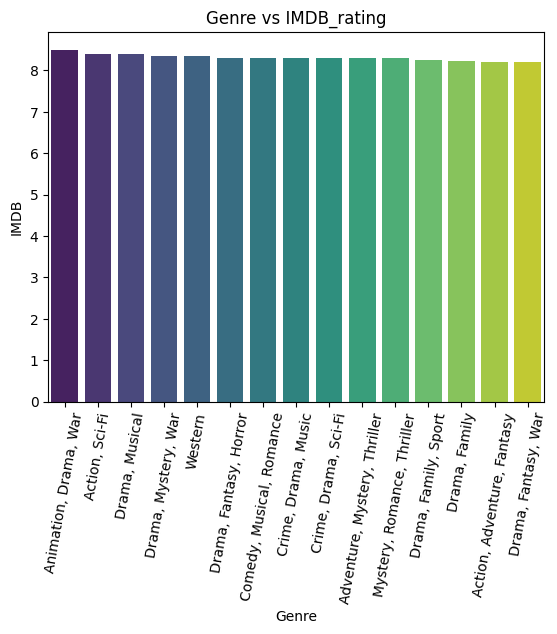

In [52]:
category=genre_cate.head(15)
sns.barplot(data=category,x='Genre',y='IMDB',palette='viridis')
plt.xticks(rotation=80)
plt.title('Genre vs IMDB_rating');

## 🔥 Correlation Heatmap

To understand the relationship between key numeric features like IMDb Rating, Meta Score, Runtime, and Gross, we use a correlation heatmap.

This helps us identify which features move together — for example, whether critic scores align with audience ratings, or if longer movies tend to earn more.


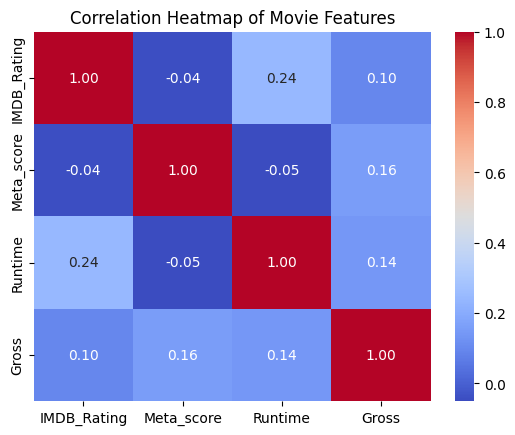

In [67]:
numeric_cols = ['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross']



sns.heatmap(file[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Movie Features');



## 🔍 Insights from the Correlation Heatmap

The correlation heatmap reveals the following:

- **IMDb Rating vs Gross**: Very weak positive correlation (0.16), indicating that highly rated movies do not necessarily earn significantly more revenue.
- **IMDb Rating vs Runtime**: Slight positive correlation (0.24), suggesting that longer movies may receive slightly better ratings from audiences.
- **IMDb Rating vs Meta Score**: Almost no correlation (-0.04), showing that audience ratings and critic reviews often differ — critical acclaim doesn't always match popular opinion.

These patterns highlight that **movie success is not solely dependent on runtime or revenue**, and audience reception can differ significantly from critic evaluations.
* It show the movie success depends on the other characteristic like **genre** ,**storytelling* etc


## 🎯 Top-Rated Movies in Each Genre

To understand which movies lead their genres, we extracted the highest-rated film from each primary genre. This helps us identify standout performers across different themes, such as Action, Drama, Comedy, etc.

Only the **first genre listed** for each movie was considered as the primary category.


In [77]:
#splitting for getting the main genres
file['main_genre']=file.Genre.apply(lambda x:x.split(',')[0])
# grouping by Genre and getting the max imdb rated for each Genre
top_per_genre=file.loc[file.groupby('main_genre').IMDB_Rating.idxmax(),['Series_Title','main_genre','Runtime','IMDB_Rating']]
top_per_genre.reset_index(drop=True)
top_per_genre.sort_values('IMDB_Rating',ascending=False,inplace=True)
top_per_genre.head(15)

,Series_Title,main_genre,Runtime,IMDB_Rating
0,The Shawshank Redemption,Drama,142,9.3
1,The Godfather,Crime,175,9.2
2,The Dark Knight,Action,152,9.0
7,Schindler's List,Biography,195,8.9
12,"Il buono, il brutto, il cattivo",Western,161,8.8
21,Interstellar,Adventure,169,8.6
19,Gisaengchung,Comedy,132,8.6
23,Sen to Chihiro no kamikakushi,Animation,125,8.6
49,Psycho,Horror,109,8.5
69,Memento,Mystery,113,8.4


# Now lets see the directors who constantly produce highest imdb Movies
* This give us a idea of the consistency of directors


In [87]:
director_mov=file.groupby('Director').IMDB_Rating.mean().reset_index()
director_mov.columns=['Director','IMDb_avg']
director_mov.sort_values('IMDb_avg',ascending=False,inplace=True)
top_10=director_mov.head(10)
print(top_10);

               Director  IMDb_avg
141      Frank Darabont      8.95
284      Lana Wachowski      8.70
191      Irvin Kershner      8.70
316    Masaki Kobayashi      8.60
135  Fernando Meirelles      8.60
158        George Lucas      8.60
472       Sudha Kongara      8.60
492         Thomas Kail      8.60
427     Roberto Benigni      8.60
342        Milos Forman      8.50


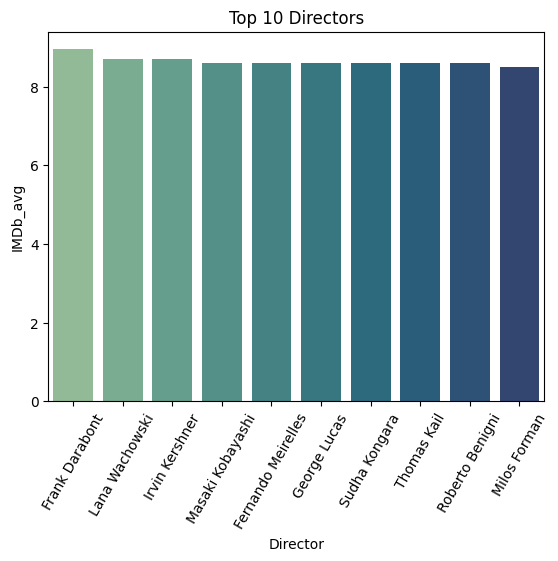

In [86]:
sns.barplot(data=top_10,x='Director',y='IMDb_avg',palette='crest')
plt.title('Top 10 Directors')
plt.xticks(rotation=60);

## 🎬 Top 10 Directors and Their Preferred Genres

After identifying the top 10 directors based on their average IMDb ratings (minimum 3 movies), we further analyzed the **most common genre** they work with.

This gives insight into each director's **creative strength** and audience preference. Some directors specialize in specific genres that consistently perform well.

### 🔍 Observations:
- **Frank Darabont**, the highest-rated director, most frequently works in **Drama** — a genre known for emotional storytelling.
- **Lana Wachowski** is strongly associated with **Sci-Fi**, reflecting her work on *The Matrix* series.
- **Irvin Kershner**, known for *Star Wars: The Empire Strikes Back*, is associated with **Action**.

This shows that many top directors **thrive within a particular genre**, contributing to their consistent success and critical acclaim.


In [103]:
top_directors=file[file.Director.isin(top_10.Director)]
top_genres=top_directors.groupby(['Director','main_genre']).size().reset_index(name='count')
new=top_genres.loc[top_genres.groupby('Director')['count'].idxmax(),['Director','main_genre']]
top_10_directors_genre=top_10.merge(new,on='Director')
print(top_10_directors_genre);

             Director  IMDb_avg main_genre
0      Frank Darabont      8.95      Crime
1      Lana Wachowski      8.70     Action
2      Irvin Kershner      8.70     Action
3    Masaki Kobayashi      8.60     Action
4  Fernando Meirelles      8.60      Crime
5        George Lucas      8.60     Action
6       Sudha Kongara      8.60      Drama
7         Thomas Kail      8.60  Biography
8     Roberto Benigni      8.60     Comedy
9        Milos Forman      8.50  Biography


# So these are the top 10 directors along with their most used genre
* This shows most of the succesful Directors tend to work on action followed by crime
# Lets see a barplot

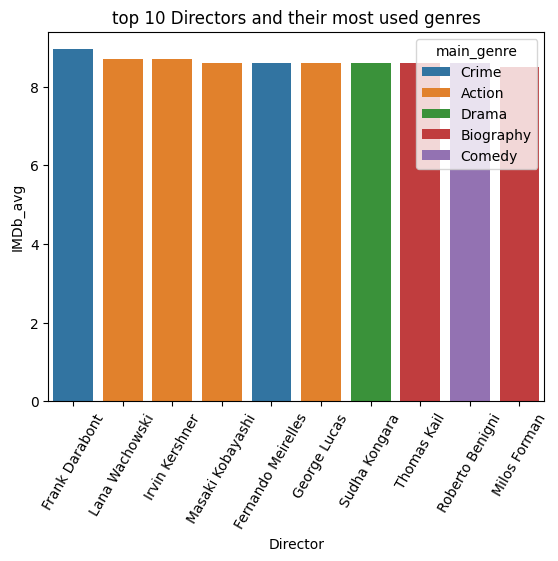

In [106]:
sns.barplot(data=top_10_directors_genre,x='Director',y='IMDb_avg',hue='main_genre')
plt.title('top 10 Directors and their most used genres')
plt.xticks(rotation=60);

In [107]:
file.to_csv('final_cleaned.csv')

## ✅ Final Conclusion

In this project, we conducted an in-depth analysis of **IMDb Top 1000 Movies**, focusing on identifying the key factors that contribute to a movie's success.

### 📌 Key Findings:
- **Genres like Drama, Biography, and Thriller** consistently receive higher IMDb ratings, suggesting audience preference for strong storytelling and character depth.
- **Directors** play a major role in movie success — **Frank Darabont**, **Lana Wachowski**, and **Irvin Kershner** lead with exceptionally high average ratings, each working predominantly in their preferred genres.
- While **Runtime** has a mild positive correlation with IMDb rating, most top-rated films fall in the **90–130 minute** range, indicating a sweet spot for pacing.
- **Certificates (U, UA, A, R)** also show rating trends — with U/UA certified movies being most common, though adult content doesn't always mean higher ratings.
- **Meta Score and Gross** show weak correlations with IMDb ratings, but combining them still adds some analytical weight.

### 📊 Tools Used:
- **Python & Pandas**: Data cleaning, transformation, and analysis
- **Matplotlib & Seaborn**: Visual storytelling through insightful plots
- **Tableau** *(next step)*: For interactive dashboards and presentations
- **SQL** *(final step)*: To showcase querying and relational understanding

### 🎯 Conclusion:
Through this project, we successfully demonstrated how data-driven storytelling can uncover what makes a movie critically successful. The combination of **genre focus, strong direction, and well-balanced runtime** appears to be key — giving us insights that are both **analytical and actionable**.

